
# SIFT feature detector and descriptor extractor

This example demonstrates the SIFT feature detection and its description
algorithm.

The scale-invariant feature transform (SIFT) [1]_ was published in 1999 and is
still one of the most popular feature detectors available, as its promises to
be "invariant to image scaling, translation, and rotation, and partially
in-variant to illumination changes and affine or 3D projection" [2]_. Its
biggest drawback is its runtime, that's said to be "at two orders of
magnitude" [3]_ slower than ORB, which makes it unsuitable for real-time
applications.

## References
.. [1] https://en.wikipedia.org/wiki/Scale-invariant_feature_transform

.. [2] D.G. Lowe. "Object recognition from local scale-invariant
       features", Proceedings of the Seventh IEEE International
       Conference on Computer Vision, 1999, vol.2, pp. 1150-1157.
       :DOI:`10.1109/ICCV.1999.790410`

.. [3] Ethan Rublee, Vincent Rabaud, Kurt Konolige and Gary Bradski
       "ORB: An efficient alternative to SIFT and SURF"
       http://www.gwylab.com/download/ORB_2012.pdf


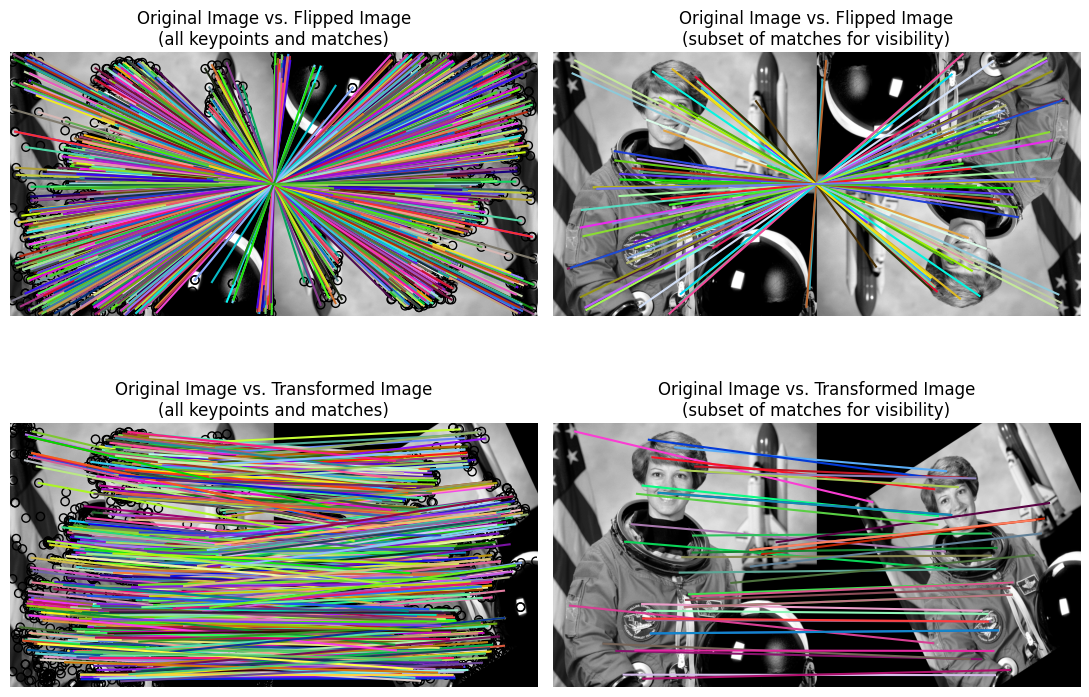

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

img1 = rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                                  translation=(0, -200))
img3 = transform.warp(img1, tform)

descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, max_ratio=0.6,
                              cross_check=True)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

plt.gray()

plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
ax[0, 0].axis('off')
ax[0, 0].set_title("Original Image vs. Flipped Image\n"
                   "(all keypoints and matches)")

plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
ax[1, 0].axis('off')
ax[1, 0].set_title("Original Image vs. Transformed Image\n"
                   "(all keypoints and matches)")

plot_matches(ax[0, 1], img1, img2, keypoints1, keypoints2, matches12[::15],
             only_matches=True)
ax[0, 1].axis('off')
ax[0, 1].set_title("Original Image vs. Flipped Image\n"
                   "(subset of matches for visibility)")

plot_matches(ax[1, 1], img1, img3, keypoints1, keypoints3, matches13[::15],
             only_matches=True)
ax[1, 1].axis('off')
ax[1, 1].set_title("Original Image vs. Transformed Image\n"
                   "(subset of matches for visibility)")

plt.tight_layout()
plt.show()